In [ ]:
# 주성분 분석 - 주성분 분석, PCA 
# 과일 사진이 너무 많아서 저장공간이 부족하다. 이 상황에 차원 축소를 할 수 있다.

# '차원'이라는 말을 쓸 때 알아야 하는 점이 있는데, 1차원 배열에서 벡터를 차원으로 논할 때는, 원소의 개수를 차원이라고 한다. ex) 5차원 벡터

# PCA는 데이터의 분산이 큰 방향을 찾는 것으로 이해한다.
# 분산이 큰 방향 = 데이터를 잘 표현하는 어떤 벡터.

# 주성분 => y=(1/2)x 방향으로 몰려있는 일차함수 주변에 원소들이 모여있다고 생각해보자.
# 그러면 위 원소들의 분산이 큰 방향을 벡터로 표현할 수 있는데, 이게 "주성분" 이라고 불리는 벡터이다. (2,1)!

# 여기서 차원 축소를 하는 법은 (2,1) 벡터에 s(4,2)를 직각으로 투영한 p(4.5)를 얻을 수 있다.

# 두 번째 주성분은 원래 주성분의 직각인 벡터이다.

# 준비
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

# Import
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

--2022-05-07 10:33:50--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2022-05-07 10:33:50--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2022-05-07 10:33:51--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... c

In [ ]:
def draw_fruits(arr,ratio=1):
  n=len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows,cols,figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i,j].imshow(arr[i*10 + j], cmap="gray_r")
      axs[i,j].axis('off')
  plt.show()

-------
50
(300, 10000)
(50, 10000)
(300, 50)
(300, 10000)


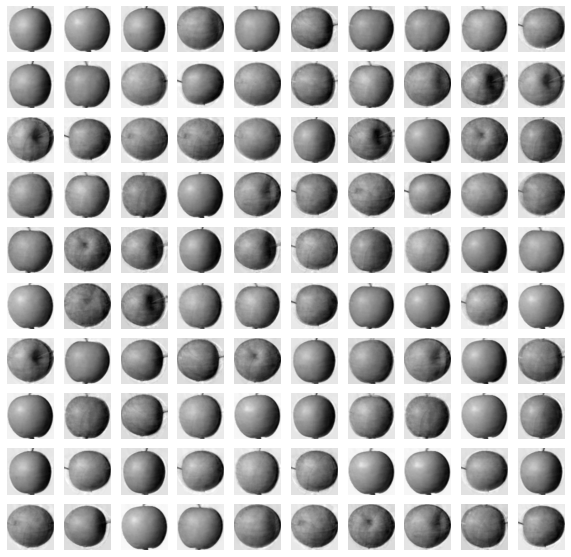

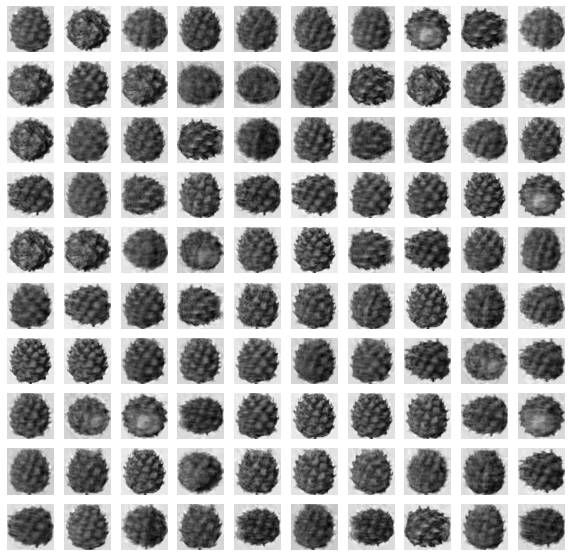

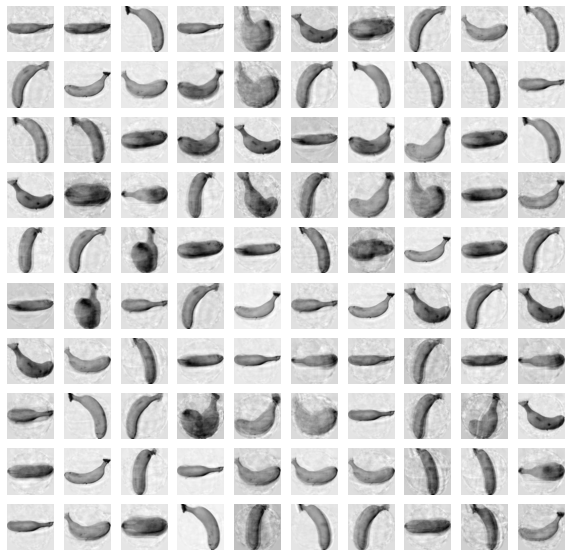

In [ ]:
from sklearn.decomposition import PCA

# 여기가 잘 이해가 안됨. 주성분은 특성의 수, 또는 샘플의 수 중 적은 수로 된다고 했는데, 50개로 지정한단건 무슨 말이지?
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(fruits_2d.shape)
print(pca.components_.shape) # 모든 특성을 대변하는 주성분이 뽑혔다고 보면 된다.

# draw_fruits(pca.components_.reshape(-1,100,100))
# draw_fruits(fruits[0:50])

# 여기서 또 이해가 안된다. 어떻게 transform이 가능한 것인가?
# 모든 특성을 주성분에 투영하는데, 이게 50개가 있는데 어떻게 가능한가?

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
# print(fruits_pca[0:5])

# 원본 데이터를 재구성 해보자.

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

# 재구성된걸 출력
# 아니 투영하는건 그렇다 치는데 어떻게 이렇게 복원함?
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print('\n')




0.9214039182083216


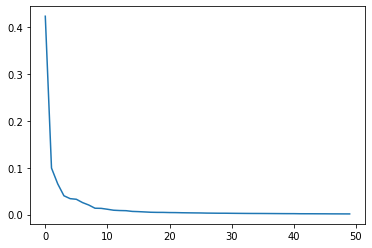

In [ ]:
# 이 주성분 분석이 원본 데이터를 얼마나 잘 담고 있는지를 확인한다
# 앞의 50개의 주성분의 비율을 모두 합하면 전체 비중의 몇퍼인지 알 수 있다.
print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.show()

In [ ]:
# 다음으로 주성분 분석으로 축소한 데이터를 지도 학습에 적용해보자.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

target = np.array([0]*100+[1]*100+[2]*100)
from sklearn.model_selection import cross_validate

# 쌩 데이터 사용했을 때
scores = cross_validate(lr,fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# PCA 처리 된 데이터를 사용했을 때
print('-------')
print(pca.n_components_)
scores = cross_validate(lr,fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

# 결론: PCA 처리 된 데이터를 사용하면 훨씬 빠르게 처리가 가능하다.


0.9966666666666667
1.435748243331909
-------
50
1.0
0.03894648551940918


In [ ]:
# 앞서 주성분의 개수를 지정했었는데 그러지말고 전체의 몇퍼센트를 가지도록 할건지 지정할 수도 있다.
pca=PCA(n_components=2)
pca.fit(fruits_2d)
print(pca.n_components_)

fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

scores = cross_validate(lr,fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

3
(300, 3)
0.9833333333333332
0.03141040802001953


(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


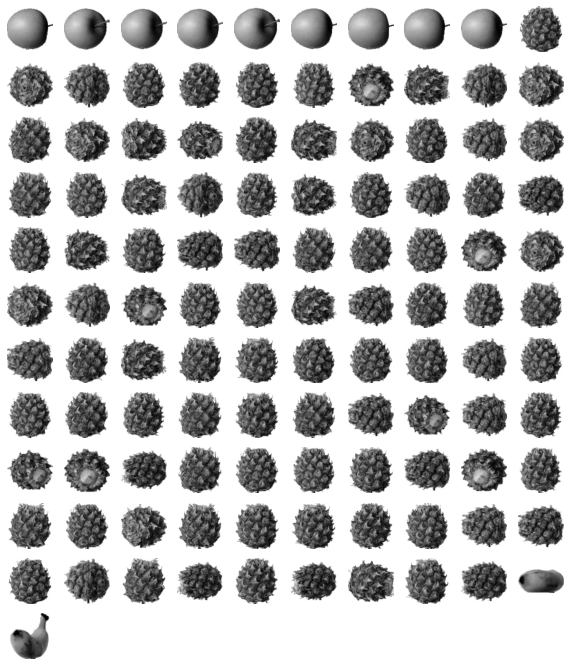

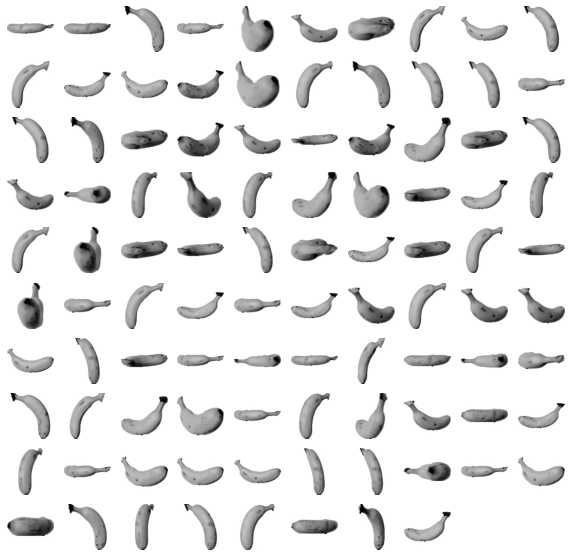

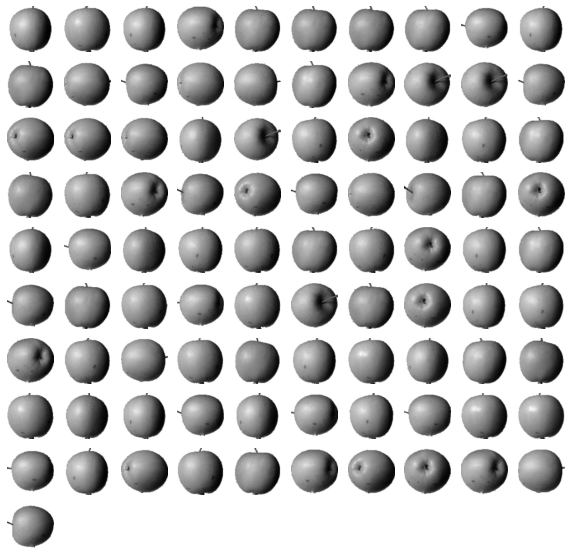

In [ ]:
# 이번에는 K 평균 알고리즘에도 쓸 수 있다.
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_,return_counts=True))

for label in range(0,3):
  draw_fruits(fruits[km.labels_==label])
  print('\n')

(300, 3)


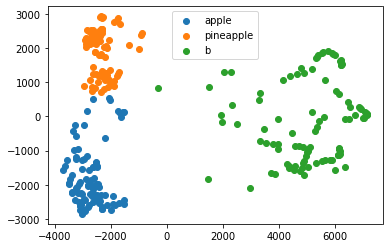

In [ ]:
# K평균의 산점도를 살펴보자.
print(fruits_pca.shape)
plt.scatter(fruits_pca[0:100,0], fruits_pca[0:100,1]) 
plt.scatter(fruits_pca[100:200,0], fruits_pca[100:200,1])
plt.scatter(fruits_pca[200:300,0], fruits_pca[200:300,1])
plt.legend(['apple','pineapple','b'])
plt.show()

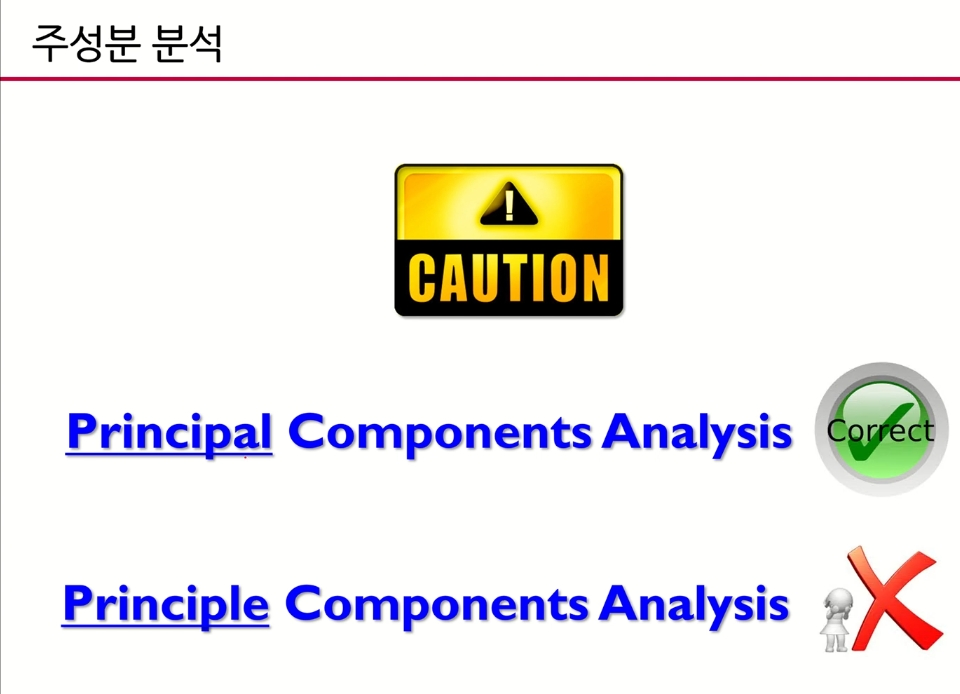